<a href="https://colab.research.google.com/github/aurllyc/aurllyc-UAS-Data-Mining/blob/main/UAS_Aurellia_Nur_Fitria_23_11_5894_311_23S1IF_BigData5_BIG_DATA_%26_DATA_MINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYEK AKHIR (UAS)**
**MATA KULIAH BIG DATA & DATA MINING**

**Judul Proyek**: Analisis Prediksi Late Delivery Risk pada E-Commerce Menggunakan Algoritma Random Forest

**Nama Dataset**: Brazilian E-Commerce Public Dataset by Olist Store

**Link Dataset**: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data

**Disusun Oleh:**

* **Nama Mahasiswa**  : Aurellia Nur Fitria  
* **NIM**             : 23.11.5894  
* **Kelas**           : 23S1IF-BigData5  
* **Nomor Kursi**     : 311  
* **Mata Kuliah**     : Big Data & Data Mining  
* **Program Studi**   : Informatika
* **Dosen Pengampu**  : Hendri Kurniawan Prakosa, S.Kom., M.Cs  

#Link:

* **Github**: https://github.com/aurllyc/aurllyc-UAS-Data-Mining.git
* **Drive**: https://drive.google.com/drive/folders/1Vs0nNxayBQmBM6Gde4ZMrjdeem2u90tN?usp=sharing
* **Colab**: https://colab.research.google.com/drive/1UdxoDkNd2AJsJyg05II-Av14ZgM4lSHE?usp=sharing
* **Laporan**: https://docs.google.com/document/d/1nU25VaEjif-jxQ3PobIgpHQ3tJ49sT4acsMiBZW-u5k/edit?usp=sharing
* **Launchinpad**:
* **Youtube**:

# **Soal:**

* Buat Sebuah Model, dengan ketentuan sebagai berikut: ( SCPMK 1682108 point 20)
    1. Wajib menggunakan dataset public. ( SCPMK 1683914 point 20)
    2. Proses mining wajib menerapkan kaidah(tahapan) dari data mining, mulai dari preprocessing sampai dengan metric evaluation. ( SCPMK 1681902 point 20)
    3. Konsep mining boleh menggunakan pendekatan Predictive Analytics maupun Descriptive Analytics (Regresi, Klasifikasi, Time series Analysis, Association rule mining, Clustering, ataupun Sequence Discovery). ( SCPMK 1682111 point 20)
    4. Tidak boleh menggunakan contoh kasus yang pernah dibahas di kelas. ( SCPMK 1682310 point 20)
    5. Laporan disimpan dalam file berformat pdf, dengan format nama file UAS_namabelakang_fullnim.pdf
    6. Format dan ketentuan penulisan dapat dilihat di https://s.amikom.ac.id/format-uas-bddm
    7. Hasil kerja dipresentasikan dalam bentuk video upload di youtube dengan konten simulasi model dan penjelasan langkah-langkahnya. Durasi maksimal 15 menit. Link youtube dilampirkan pada laporan.

# Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
base_path = "/content/drive/MyDrive/Big Data & Mining/UAS_Aurellia Nur Fitria_23.11.5894/Dataset/Dataset Olist Store/"

# 1. LOAD DATASET
orders = pd.read_csv(base_path + 'olist_orders_dataset.csv')
items = pd.read_csv(base_path + 'olist_order_items_dataset.csv')
products = pd.read_csv(base_path + 'olist_products_dataset.csv')
customers = pd.read_csv(base_path + 'olist_customers_dataset.csv')
sellers = pd.read_csv(base_path + 'olist_sellers_dataset.csv')

# Data Understanding

In [4]:
print(f"Orders: {orders.shape}")
print(f"Items: {items.shape}")
print(f"Products: {products.shape}")
print(f"Customers: {customers.shape}")
print(f"Sellers: {sellers.shape}")

Orders: (99441, 8)
Items: (112650, 7)
Products: (32951, 9)
Customers: (99441, 5)
Sellers: (3095, 4)


In [5]:
print(f"Orders:")
orders.info()
orders.head()

Orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
print("Items:")
items.info()
items.head()

Items:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
print(f"products:")
products.info()
products.head()

products:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
print("customers:")
customers.info()
customers.head()

customers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
print("sellers:")
sellers.info()
sellers.head()

sellers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


# Type Conversion

In [10]:
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
]

for col in date_cols:
    orders[col] = pd.to_datetime(orders[col])

# Category
cols_category = ['order_status']

for col in cols_category:
    orders[col] = orders[col].astype('category')

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), object(2)
memory usage: 5.4+ MB


In [11]:
print("Status unik order status:")
orders['order_status'].value_counts()

Status unik order status:


,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


# Data Cleaning

In [12]:
# filter pada order_status yang 'delivered'
orders = orders[orders['order_status'] == 'delivered'].copy()

In [13]:
# Hapus data yang kosong (Missing Value)
orders.dropna(subset=['order_delivered_customer_date', 'order_estimated_delivery_date'], inplace=True)
products.dropna(subset=['product_width_cm'], inplace=True)

print(f"Orders setelah cleaning: {orders.shape[0]}")
print(f"Products setelah cleaning: {products.shape[0]}")

Orders setelah cleaning: 96470
Products setelah cleaning: 32949


In [14]:
orders.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,14
order_delivered_carrier_date,1
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [15]:
products.isnull().sum()

,0
product_id,0
product_category_name,609
product_name_lenght,609
product_description_lenght,609
product_photos_qty,609
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


# Data Merging

In [16]:
# Agregasi items (Harga & Jumlah)
items_agg = (
    items
    .groupby("order_id")
    .agg(
        total_items=("order_item_id", "count"),
        total_price=("price", "sum"),
        total_freight=("freight_value", "sum"),
        n_sellers=("seller_id", "nunique"),
        #  seller pertama/terbanyak sebagai seller utama
        main_seller_id=("seller_id", lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0])
    )
    .reset_index()
)

display(items_agg.head())


,order_id,total_items,total_price,total_freight,n_sellers,main_seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29,1,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93,1,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,1,199.00,17.87,1,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79,1,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14,1,df560393f3a51e74553ab94004ba5c87


In [17]:
# AGREGASI PRODUK (Berat & Volume)
# Hitung Volume (cm3) - Rumus: Panjang x Lebar x Tinggi
products['product_volume_cm3'] = (
    products['product_length_cm'] *
    products['product_height_cm'] *
    products['product_width_cm']
)

# Gabungkan items dengan products
df = pd.merge(items, products, on='product_id', how='left')


# Agregasi product
product_agg = df.groupby('order_id').agg(
    total_weight_g=("product_weight_g", "sum"),
    total_volume_cm3=("product_volume_cm3", "sum")
).reset_index()

display(product_agg.head())

,order_id,total_weight_g,total_volume_cm3
0,00010242fe8c5a6d1ba2dd792cb16214,650.0,3528.0
1,00018f77f2f0320c557190d7a144bdd3,30000.0,60000.0
2,000229ec398224ef6ca0657da4fc703e,3050.0,14157.0
3,00024acbcdf0a6daa1e931b038114c75,200.0,2400.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,3750.0,42000.0


In [18]:
# Join Orders - Items_Agg
df = pd.merge(orders, items_agg, on='order_id', how='left')

#Join - Products_Agg
df = pd.merge(df, product_agg, on='order_id', how='left')

#Join - Customers
df = pd.merge(df, customers[['customer_id', 'customer_zip_code_prefix', 'customer_state']], on='customer_id', how='left')

In [19]:
# Join Seller (Lokasi Asal)
df = pd.merge(
    df,
    sellers[['seller_id', 'seller_zip_code_prefix', 'seller_state']],
    left_on='main_seller_id',
    right_on='seller_id',
    how='left'
)

In [20]:
# Rename kolom zip code
df.rename(columns={
    'customer_zip_code_prefix': 'customer_zip',
    'seller_zip_code_prefix': 'seller_zip'
}, inplace=True)

print(f"Dataset shape: {df.shape}")
display(df.head())

Dataset shape: (96470, 20)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_items,total_price,total_freight,n_sellers,main_seller_id,total_weight_g,total_volume_cm3,customer_zip,customer_state,seller_id,seller_zip,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,29.99,8.72,1,3504c0cb71d7fa48d967e0e4c94d59d9,500.0,1976.0,3149,SP,3504c0cb71d7fa48d967e0e4c94d59d9,9350,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,118.70,22.76,1,289cdb325fb7e7f891c38608bf9e0962,400.0,4693.0,47813,BA,289cdb325fb7e7f891c38608bf9e0962,31570,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,159.90,19.22,1,4869f7a5dfa277a7dca6462dcf3b52b2,420.0,9576.0,75265,GO,4869f7a5dfa277a7dca6462dcf3b52b2,14840,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,45.00,27.20,1,66922902710d126a0e7d26b0e3805106,450.0,6000.0,59296,RN,66922902710d126a0e7d26b0e3805106,31842,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,19.90,8.72,1,2c9e548be18521d1c43cde1c582c6de8,250.0,11475.0,9195,SP,2c9e548be18521d1c43cde1c582c6de8,8752,SP


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96470 entries, 0 to 96469
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96470 non-null  object        
 1   customer_id                    96470 non-null  object        
 2   order_status                   96470 non-null  category      
 3   order_purchase_timestamp       96470 non-null  datetime64[ns]
 4   order_approved_at              96456 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96469 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96470 non-null  datetime64[ns]
 8   total_items                    96470 non-null  int64         
 9   total_price                    96470 non-null  float64       
 10  total_freight                  96470 non-null  float64       
 11  n_sellers      

In [22]:
df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,14
order_delivered_carrier_date,1
order_delivered_customer_date,0
order_estimated_delivery_date,0
total_items,0
total_price,0


# Feature Engineering (Distance & Time)

In [23]:
import numpy as np

# GEOLOCATION DATA
geo = pd.read_csv(base_path + 'olist_geolocation_dataset.csv')

# Agregasi
geo_agg = geo.groupby('geolocation_zip_code_prefix').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean'
}).reset_index()

In [24]:
# MERGE COORDINATES
# Join Koordinat Customer
df = df.merge(
    geo_agg,
    left_on='customer_zip',
    right_on='geolocation_zip_code_prefix',
    how='left'
).rename(columns={'geolocation_lat': 'cust_lat', 'geolocation_lng': 'cust_lng'})

# Join Koordinat Seller
df = df.merge(
    geo_agg,
    left_on='seller_zip',
    right_on='geolocation_zip_code_prefix',
    how='left'
).rename(columns={'geolocation_lat': 'seller_lat', 'geolocation_lng': 'seller_lng'})

# Drop kolom zip prefix bantuan yang double
df.drop(columns=['geolocation_zip_code_prefix_x', 'geolocation_zip_code_prefix_y'], inplace=True, errors='ignore')

In [25]:
# Distance
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius Bumi dalam km
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

df['distance_km'] = haversine_distance(
    df['cust_lat'], df['cust_lng'],
    df['seller_lat'], df['seller_lng']
)

In [26]:
# Time Features
# Seller Processing Time: (Diserahkan ke Kurir - Disetujui)
# Berapa hari seller butuh waktu untuk mengemas barang?
df['seller_processing_time'] = (df['order_delivered_carrier_date'] - df['order_approved_at']).dt.total_seconds() / 86400

# Actual Delivery Time: (Sampai di Customer - Dibeli)
# Berapa hari total pengiriman dari lokasi ke tujuan?
df['actual_delivery_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.total_seconds() / 86400

In [27]:
# Cleaning Data
df['distance_km'] = df['distance_km'].fillna(df['distance_km'].median())

# data error (noise)
error_data = df[df['seller_processing_time'] < 0]
print(f"Menghapus {len(error_data)} baris data error (Negative Processing Time)")
df = df[df['seller_processing_time'] >= 0]

Menghapus 1350 baris data error (Negative Processing Time)


In [28]:
display(df[['distance_km', 'seller_processing_time', 'total_volume_cm3']].describe())

display(df[['order_id', 'distance_km', 'seller_processing_time']].head())

,distance_km,seller_processing_time,total_volume_cm3
count,95105.000000,95105.000000,9.510500e+04
mean,600.011420,2.853391,1.737229e+04
std,592.164246,3.485513,3.024013e+04
min,0.000000,0.000174,0.000000e+00
25%,189.677193,0.900556,2.964000e+03
50%,433.938233,1.849051,7.260000e+03
75%,795.949534,3.618484,1.987200e+04
max,8677.911622,125.762569,1.476000e+06


,order_id,distance_km,seller_processing_time
0,e481f51cbdc54678b7cc49136f2d6af7,18.576110,2.366493
1,53cdb2fc8bc7dce0b6741e2150273451,851.495069,0.462882
2,47770eb9100c2d0c44946d9cf07ec65d,514.410666,0.204595
3,949d5b44dbf5de918fe9c16f97b45f8a,1822.226336,3.745833
4,ad21c59c0840e6cb83a9ceb5573f8159,29.676625,0.893113


# Labeling Target Variable

In [29]:
# tanggal delivered > tanggal estimasi = 1 (Late), selain itu 0.
df['is_late'] = (df['order_delivered_customer_date'] > df['order_estimated_delivery_date']).astype(int)

In [30]:
# Cek Distribusi Kelas
target_counts = df['is_late'].value_counts()
target_percent = df['is_late'].value_counts(normalize=True) * 100

dist_table = pd.concat([target_counts, target_percent], axis=1, keys=['Count', 'Percent'])
display(dist_table)

,Count,Percent
is_late,,
0,87313,91.80695
1,7792,8.19305


In [31]:
# Contoh data yang Late vs On-Time
print("\nDATA LATE (1)")
cols_check = ['order_id', 'order_estimated_delivery_date', 'order_delivered_customer_date', 'is_late']
display(df[df['is_late'] == 1][cols_check].head(3))

print("\nDATA ON-TIME (0)")
display(df[df['is_late'] == 0][cols_check].head(3))


DATA LATE (1)


,order_id,order_estimated_delivery_date,order_delivered_customer_date,is_late
19,203096f03d82e0dffbc41ebc2e2bcfb7,2017-09-28,2017-10-09 22:23:46,1
24,fbf9ac61453ac646ce8ad9783d7d0af6,2018-03-12,2018-03-21 22:03:54,1
34,8563039e855156e48fccee4d611a3196,2018-03-20,2018-03-20 00:59:25,1



DATA ON-TIME (0)


,order_id,order_estimated_delivery_date,order_delivered_customer_date,is_late
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-18,2017-10-10 21:25:13,0
1,53cdb2fc8bc7dce0b6741e2150273451,2018-08-13,2018-08-07 15:27:45,0
2,47770eb9100c2d0c44946d9cf07ec65d,2018-09-04,2018-08-17 18:06:29,0


/tmp/ipython-input-978130122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_late', data=df, palette='coolwarm')


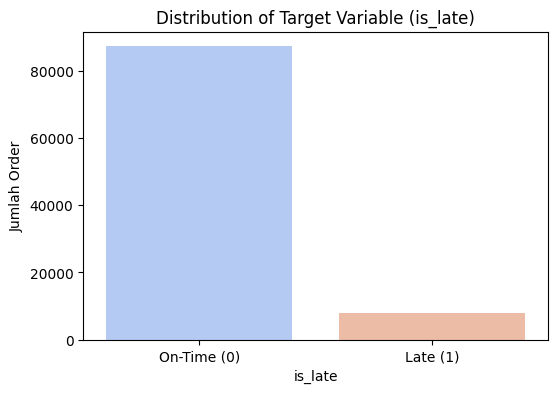

In [32]:
# Visualisasi Imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='is_late', data=df, palette='coolwarm')
plt.title('Distribution of Target Variable (is_late)')
plt.xticks([0, 1], ['On-Time (0)', 'Late (1)'])
plt.ylabel('Jumlah Order')
plt.show()

# Exploratory Data Analysis (EDA)

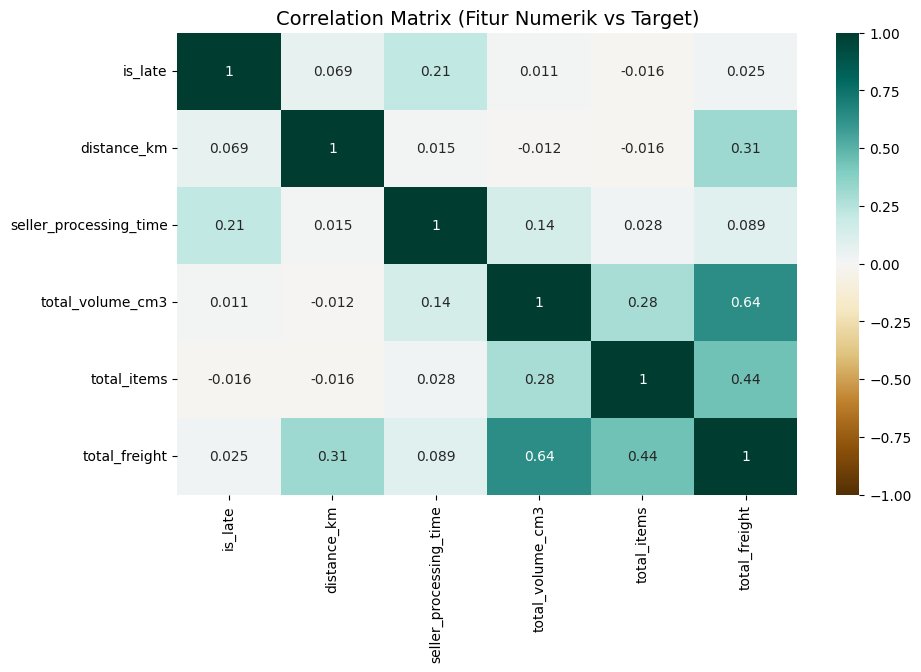

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Korelasi Num
corr_cols = ['is_late', 'distance_km', 'seller_processing_time',
             'total_volume_cm3', 'total_items', 'total_freight']

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df[corr_cols].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation Matrix (Fitur Numerik vs Target)', fontsize=14)
plt.show()

/tmp/ipython-input-2890829172.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_late_rate.index, y=state_late_rate.values, palette='Reds_r')


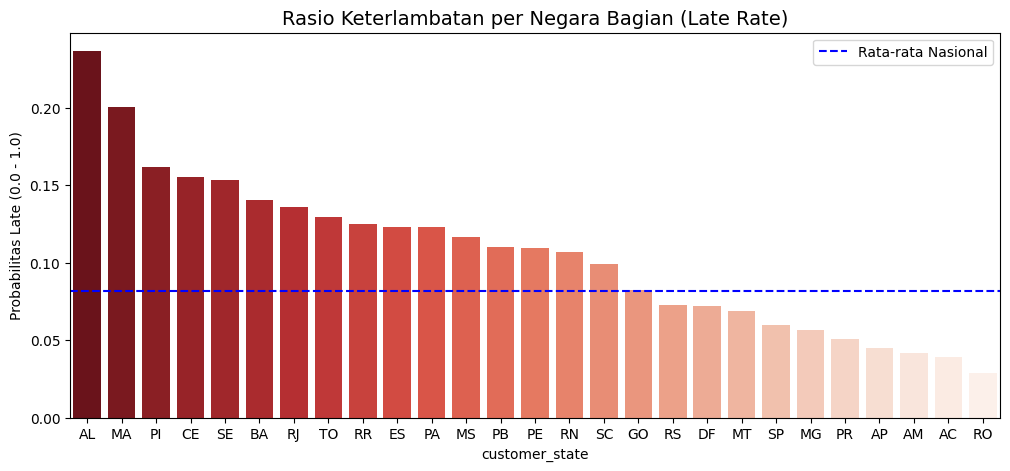

In [34]:
# Analisis Geo (State)
# Negara bagian mana yang paling sering telat?
state_late_rate = df.groupby('customer_state')['is_late'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=state_late_rate.index, y=state_late_rate.values, palette='Reds_r')
plt.title('Rasio Keterlambatan per Negara Bagian (Late Rate)', fontsize=14)
plt.ylabel('Probabilitas Late (0.0 - 1.0)')
plt.axhline(y=df['is_late'].mean(), color='blue', linestyle='--', label='Rata-rata Nasional')
plt.legend()
plt.show()

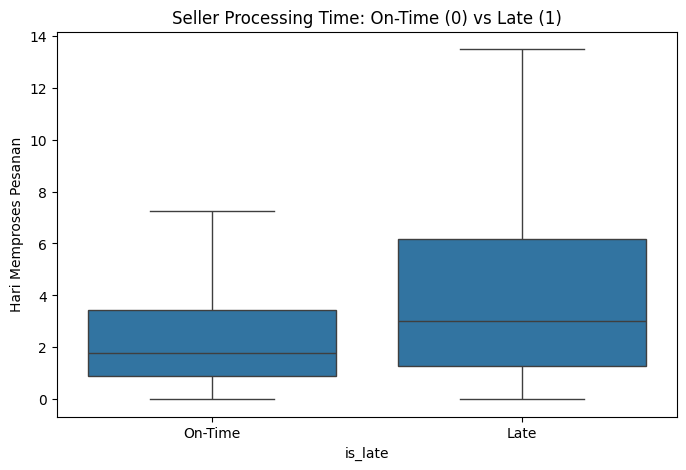

Top 3 Negara Bagian Paling Sering Telat:
customer_state
AL    0.236641
MA    0.200284
PI    0.162047
Name: is_late, dtype: float64


In [35]:
# Analisis Perilaku Seller
# Apakah seller yang lambat memproses barang cenderung bikin telat?
plt.figure(figsize=(8, 5))

# limit y-axis agar outlier ekstrem tidak merusak grafik
sns.boxplot(x='is_late', y='seller_processing_time', data=df, showfliers=False)
plt.title('Seller Processing Time: On-Time (0) vs Late (1)')
plt.ylabel('Hari Memproses Pesanan')
plt.xticks([0, 1], ['On-Time', 'Late'])
plt.show()

print(f"Top 3 Negara Bagian Paling Sering Telat:\n{state_late_rate.head(3)}")

# Feature Selection & Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder

# Feature Eng
# Promised Days = Tanggal Estimasi - Tanggal Beli
df['promised_days'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days

In [37]:
# Select X (Features)
feature_cols = [
    # Fitur Numerik
    'distance_km', 'seller_processing_time', 'promised_days',
    'total_items', 'total_price', 'total_freight',
    'total_weight_g', 'total_volume_cm3',
    # Fitur Kategorikal
    'customer_state', 'seller_state'
]

# DataFrame X (Features) dan Series y (Target)
X = df[feature_cols].copy()
y = df['is_late'].copy()

In [38]:
# Label Encoding
# Mengubah State (SP, RJ, dll) menjadi angka (0, 1, 2...)
le = LabelEncoder()

# Encode Customer State
X['customer_state'] = le.fit_transform(X['customer_state'])

# Encode Seller State
X['seller_state'] = le.fit_transform(X['seller_state'])

In [39]:
# Missing Value
X = X.fillna(0)

print(f"Shape X (Features): {X.shape}")
print(f"Shape y (Target)  : {y.shape}")

print("\nSampel Data Latih (X)")
display(X.head())

Shape X (Features): (95105, 10)
Shape y (Target)  : (95105,)

Sampel Data Latih (X)


,distance_km,seller_processing_time,promised_days,total_items,total_price,total_freight,total_weight_g,total_volume_cm3,customer_state,seller_state
0,18.576110,2.366493,15,1,29.99,8.72,500.0,1976.0,25,21
1,851.495069,0.462882,19,1,118.70,22.76,400.0,4693.0,4,21
2,514.410666,0.204595,26,1,159.90,19.22,420.0,9576.0,8,21
3,1822.226336,3.745833,26,1,45.00,27.20,450.0,6000.0,19,7
4,29.676625,0.893113,12,1,19.90,8.72,250.0,11475.0,25,21


# Train-Test Split & Scaling

In [40]:
# Splitting Data (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  #  agar rasio imbalance konsisten
)

In [41]:
# Standard Scaling
# Inisialisasi Scaler
scaler = StandardScaler()

# Fit pada Training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform pada Test set
X_test_scaled = scaler.transform(X_test)

In [42]:
# Validasi Dimensi & Leakage
print(f"Total Data: {len(X)}")
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape : {X_test_scaled.shape}")

print("\nRasio Target Setelah Split")
print(f"Rasio Late di Train: {y_train.mean():.4f}")
print(f"Rasio Late di Test : {y_test.mean():.4f}")

Total Data: 95105
X_train shape: (76084, 10)
X_test shape : (19021, 10)

Rasio Target Setelah Split
Rasio Late di Train: 0.0819
Rasio Late di Test : 0.0819


# Modeling (Training)

In [43]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Linear Regression (Baseline)

In [44]:
start_time = time.time()

# Inisialisasi Model (Max iter dinaikkan agar konvergensi aman)
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Fit pada data SCALED
logreg.fit(X_train_scaled, y_train)

lr_time = time.time() - start_time
print(f"Logistic Regression Selesai dalam: {lr_time:.2f} detik")

Logistic Regression Selesai dalam: 0.18 detik


# Random Forest (Model Utama)

In [45]:
start_time = time.time()

# Inisialisasi Model
# n_estimators=100 (jumlah pohon), n_jobs=-1 (gunakan semua core CPU)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Fit pada data Asli (Tanpa Scaling)
rf.fit(X_train, y_train)

rf_time = time.time() - start_time
print(f"Random Forest Selesai dalam: {rf_time:.2f} detik")

Random Forest Selesai dalam: 24.62 detik


# Model Evaluation

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prediksi
# Logistic Regression (data Scaled)
y_pred_lr = logreg.predict(X_test_scaled)

# Random Forest (data Ori)
y_pred_rf = rf.predict(X_test)

In [47]:
# Evlauasi
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluasi Model: {model_name}")

    # Hitung metrik dasar
    acc = accuracy_score(y_true, y_pred)
    print(f"Akurasi Global: {acc:.2%}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Tampilkan Confusion Matrix Sederhana
    print("Confusion Matrix:")
    print(f"Benar On-Time (TN): {cm[0][0]} | Salah Tebak Telat (FP): {cm[0][1]}")
    print(f"Gagal Deteksi Telat (FN): {cm[1][0]} | Benar Telat (TP): {cm[1][1]}")

    # Hitung Recall Spesifik Late
    recall_late = cm[1][1] / (cm[1][0] + cm[1][1])
    print(f"\nRecal Kelas 'LATE': {recall_late:.2%}")
    print("-" * 50)

In [48]:
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
print("\n")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Evaluasi Model: Logistic Regression
Akurasi Global: 92.06%

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     17463
           1       0.66      0.06      0.11      1558

    accuracy                           0.92     19021
   macro avg       0.79      0.53      0.54     19021
weighted avg       0.90      0.92      0.89     19021

Confusion Matrix:
Benar On-Time (TN): 17414 | Salah Tebak Telat (FP): 49
Gagal Deteksi Telat (FN): 1461 | Benar Telat (TP): 97

Recal Kelas 'LATE': 6.23%
--------------------------------------------------


Evaluasi Model: Random Forest
Akurasi Global: 92.46%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     17463
           1       0.74      0.12      0.21      1558

    accuracy                           0.92     19021
   macro avg       0.83      0.56      0.59     19021
weighted avg       0.91      0.92 

# Handling Imbalanced Data (SMOTE)

In [49]:
from imblearn.over_sampling import SMOTE

# SMOTE
smote = SMOTE(random_state=42)

# Fit pada X_train, y_train
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Cek hasil resampling
print(f"Shape Sebelum SMOTE: {y_train.value_counts().to_dict()}")
print(f"Shape Sesudah SMOTE: {y_train_smote.value_counts().to_dict()}")
# Harusnya jumlah Late = Jumlah On-Time sekarang

Shape Sebelum SMOTE: {0: 69850, 1: 6234}
Shape Sesudah SMOTE: {0: 69850, 1: 69850}


In [50]:
# Retrain Random Forest
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [51]:
# Evaluasi Ulang
# Prediksi ke Test Set (Asli/Imbalance)
y_pred_smote = rf_smote.predict(X_test)

print("Evaluasi Model: Random Forest + SMOTE")
print(classification_report(y_test, y_pred_smote))

# Recall Spesifik
cm = confusion_matrix(y_test, y_pred_smote)
tn, fp, fn, tp = cm.ravel()
recall_late = tp / (tp + fn)
precision_late = tp / (tp + fp)

print(f"Confusion Matrix:\n{cm}")
print(f"\nRecall Kelas 'LATE' (Target): {recall_late:.2%}")
print(f"Precision Kelas 'LATE'      : {precision_late:.2%}")

# Bandingkan improvement
print(f"\nImprovement Recall: Dari 12.26% - Menjadi {recall_late:.2%}")


Evaluasi Model: Random Forest + SMOTE ===
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     17463
           1       0.28      0.36      0.31      1558

    accuracy                           0.87     19021
   macro avg       0.61      0.64      0.62     19021
weighted avg       0.89      0.87      0.88     19021

Confusion Matrix:
[[15984  1479]
 [  992   566]]

Recall Kelas 'LATE' (Target): 36.33%
Precision Kelas 'LATE'      : 27.68%

Improvement Recall: Dari 12.26% - Menjadi 36.33%


# Model Interpretation (Feature Importance)

In [52]:
# Ekstraksi Model Interpretation (Feature Importance)
importances = rf_smote.feature_importances_
feature_names = X.columns

# Buat DataFrame
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

/tmp/ipython-input-3842268601.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


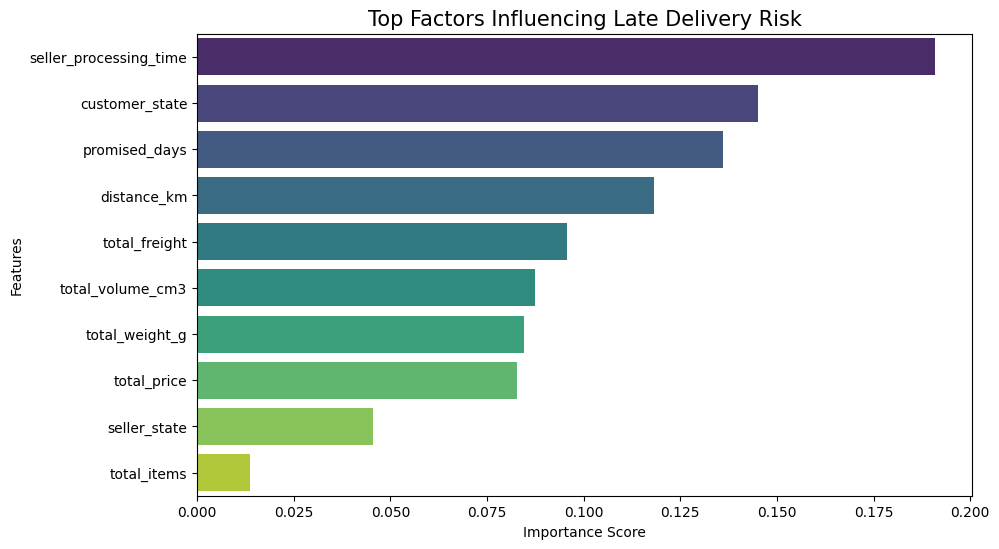

In [53]:
# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Top Factors Influencing Late Delivery Risk', fontsize=15)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [55]:
# TOP 10 FITUR
print("\n# TOP 10 FAKTOR PENYEBAB KETERLAMBATAN")
for index, row in feature_imp_df.head(10).iterrows():
    print(f"{row['Feature']:<25} : {row['Importance']:.4f}")


# TOP 10 FAKTOR PENYEBAB KETERLAMBATAN
seller_processing_time    : 0.1909
customer_state            : 0.1452
promised_days             : 0.1360
distance_km               : 0.1181
total_freight             : 0.0957
total_volume_cm3          : 0.0874
total_weight_g            : 0.0845
total_price               : 0.0829
seller_state              : 0.0455
total_items               : 0.0138
